# Explore Work

In [228]:
import pandas as pd
import numpy as np

from scipy import stats 

# importing functions and code from wrangle module
import wrangle as w

import matplotlib.pyplot as plt
import seaborn as sns

# Turn off pink warning boxes in notebook
import warnings
warnings.filterwarnings("ignore")

# Handle large numbers w/o using scientific notation
pd.options.display.float_format = '{:.3f}'.format

# Prevent df columns from being truncated
pd.set_option('display.max_columns', None) 

import sklearn.preprocessing
# feature selection
from sklearn.feature_selection import SelectKBest, f_regression, RFE 
# modeling
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
# evaluation
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

## Acquiring the data that has been prepared for exploration..

In [2]:
train, validate, test = w.prepare_data(w.clean_data(w.acquire_data('mvi_county.csv', 'acs2017_county_data.csv')))

✅ mvi_county.csv successfully acquired.
✅ acs2017_county_data.csv successfully acquired.

✅ DataFrames successfully joined.

✅ Data is cleaned.

✅ Data has been successfully split and is ready for exploration.
train -> (1758, 28)
validate -> (754, 28)
test -> (628, 28)



## Looking at the data...

In [3]:
train.head()

,state,th1,th2,th3,th4,th5,county,pop_total,pop_men,pop_women,hispanic,white,black,native,asian,pacific,pop_vot_age,income,poverty,child_poverty,wfh,avg_commute,employed,selfemployed,unemployment,mvi,more_women,perc_women
41013,Oregon,11.370,33.650,64.150,29.700,35.820,Crook County,21717,10627,11090,7.600,88.400,0.200,0.900,0.300,0.400,16984,41777,15.300,23.100,6.500,23.400,8828,10.100,8.300,30.560,True,51.100
45005,South Carolina,59.850,98.310,78.920,50.080,96.820,Allendale County,9402,4952,4450,3.100,22.500,73.500,0.500,0.000,0.000,7492,23331,30.400,52.700,1.600,28.300,2668,5.700,17.300,95.770,False,47.300
48231,Texas,73.730,64.440,50.430,98.030,85.290,Hunt County,90322,44432,45890,15.300,72.900,7.800,0.800,1.200,0.000,65205,49319,18.800,26.200,3.600,30.800,38753,6.200,6.500,93.090,True,50.800
48065,Texas,97.580,17.960,35.690,93.730,12.860,Carson County,6033,2888,3145,9.700,86.400,0.600,0.400,0.500,0.200,4433,67010,6.400,7.800,3.300,19.700,2896,8.100,1.900,41.710,True,52.100
12125,Florida,17.640,92.420,61.730,83.730,75.520,Union County,15300,9922,5378,5.400,69.900,21.900,0.700,0.500,0.000,12093,37460,21.400,32.300,4.200,22.400,3800,5.500,9.800,78.130,False,35.200


In [4]:
train.shape

(1758, 28)

In [5]:
train.describe()

,th1,th2,th3,th4,th5,pop_total,pop_men,pop_women,hispanic,white,black,native,asian,pacific,pop_vot_age,income,poverty,child_poverty,wfh,avg_commute,employed,selfemployed,unemployment,mvi,perc_women
count,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000,1758.000
mean,50.399,50.250,50.296,50.598,50.366,103254.633,50822.594,52432.038,9.263,76.590,9.000,1.791,1.281,0.078,72805.746,49486.032,16.110,22.261,4.767,23.446,48259.688,7.731,6.382,50.511,49.892
std,28.679,28.838,29.086,29.022,29.144,313265.265,153681.448,159637.592,13.897,20.174,14.643,7.548,2.744,0.401,206646.868,13309.367,6.659,10.434,2.969,5.759,150008.250,3.856,3.113,29.202,2.552
min,0.030,0.030,0.000,0.000,0.000,453.000,235.000,218.000,0.000,0.600,0.000,0.000,0.000,0.000,296.000,19264.000,2.400,0.000,0.000,6.100,183.000,0.000,0.000,0.000,19.200
25%,25.828,25.418,24.428,25.875,25.128,10923.000,5484.250,5393.250,2.100,64.325,0.600,0.100,0.200,0.000,8093.000,41034.500,11.400,14.800,2.900,19.600,4460.500,5.200,4.400,24.847,49.500
50%,51.175,49.775,50.825,50.780,50.000,25224.500,12499.000,12561.500,3.950,84.300,2.000,0.300,0.600,0.000,19144.500,47733.500,15.200,21.150,4.100,23.200,10396.000,6.800,6.000,50.555,50.400
75%,75.252,75.703,75.388,76.203,75.602,63956.750,31716.750,32106.250,9.600,93.000,10.000,0.600,1.200,0.100,48292.250,55441.750,19.700,28.075,5.800,27.075,28413.500,9.200,7.800,76.400,51.100
max,100.000,99.970,100.000,99.940,99.940,5238541.000,2540704.000,2697837.000,99.200,100.000,86.400,82.200,41.800,11.400,3538445.000,129588.000,52.000,76.500,28.300,45.100,2521437.000,31.800,28.700,100.000,58.100


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 41013 to 2110
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          1758 non-null   object 
 1   th1            1758 non-null   float64
 2   th2            1758 non-null   float64
 3   th3            1758 non-null   float64
 4   th4            1758 non-null   float64
 5   th5            1758 non-null   float64
 6   county         1758 non-null   object 
 7   pop_total      1758 non-null   int64  
 8   pop_men        1758 non-null   int64  
 9   pop_women      1758 non-null   int64  
 10  hispanic       1758 non-null   float64
 11  white          1758 non-null   float64
 12  black          1758 non-null   float64
 13  native         1758 non-null   float64
 14  asian          1758 non-null   float64
 15  pacific        1758 non-null   float64
 16  pop_vot_age    1758 non-null   int64  
 17  income         1758 non-null   int64  
 18  pove

### Breaking the variables out by dtype...

## Creating a column for the `region`
In [**this writeup**](https://mvi.surgoventures.org/) of the original study, I saw that there were unique finding across geographic `region`s so this is a feature I would like to explore and model on as well. 

In [7]:
# dictionary that maps each state to its corresponding region

states_to_regions = {
    'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Nevada': 'West',
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Utah': 'West',
    'Colorado': 'West', 'Alaska': 'West', 'Hawaii': 'West', 'Maine': 'Northeast',
    'Vermont': 'Northeast', 'New York': 'Northeast', 'New Hampshire': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest', 'Wisconsin': 'Midwest',
    'Illinois': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'West Virginia': 'South', 'District of Columbia': 'South', 'Maryland': 'South',
    'Virginia': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'North Carolina': 'South',
    'Mississippi': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Alabama': 'South',
    'Georgia': 'South', 'South Carolina': 'South', 'Florida': 'South', 'Delaware': 'South',
    'Arizona': 'Southwest', 'New Mexico': 'Southwest', 'Oklahoma': 'Southwest',
    'Texas': 'Southwest'}

In [8]:
train['region'] = train.state.map(states_to_regions)
train.head(2)

,state,th1,th2,th3,th4,th5,county,pop_total,pop_men,pop_women,hispanic,white,black,native,asian,pacific,pop_vot_age,income,poverty,child_poverty,wfh,avg_commute,employed,selfemployed,unemployment,mvi,more_women,perc_women,region
41013,Oregon,11.370,33.650,64.150,29.700,35.820,Crook County,21717,10627,11090,7.600,88.400,0.200,0.900,0.300,0.400,16984,41777,15.300,23.100,6.500,23.400,8828,10.100,8.300,30.560,True,51.100,West
45005,South Carolina,59.850,98.310,78.920,50.080,96.820,Allendale County,9402,4952,4450,3.100,22.500,73.500,0.500,0.000,0.000,7492,23331,30.400,52.700,1.600,28.300,2668,5.700,17.300,95.770,False,47.300,South


In [9]:
# creating empty lists to be appended in for loop
obj_list = []
num_list = []
bool_list = []

# for loop to append df columns to corresponding lists
for col in train.columns:
    if train[col].dtype == 'O':
        obj_list.append(col)
    elif train[col].dtype == 'bool':
        bool_list.append(col)
    else:
        num_list.append(col)
        
print(f'Object List:\n{obj_list}\n\nNumeric List:\n{num_list}\n\nBool List:\n{bool_list}')

Object List:
['state', 'county', 'region']

Numeric List:
['th1', 'th2', 'th3', 'th4', 'th5', 'pop_total', 'pop_men', 'pop_women', 'hispanic', 'white', 'black', 'native', 'asian', 'pacific', 'pop_vot_age', 'income', 'poverty', 'child_poverty', 'wfh', 'avg_commute', 'employed', 'selfemployed', 'unemployment', 'mvi', 'perc_women']

Bool List:
['more_women']


In [10]:
def plot_numvar_target(df, x_var):
    
    '''

    '''
    
    sns.scatterplot(x = x_var, y = 'mvi', data = df)
    plt.title(f'{x_var} and mvi')
    plt.show();
    
    # calculate the (r) corr coefficient and (p) p-value and then print results 
    r, p = stats.spearmanr(df[x_var], df['mvi'])
    print(f'The r-value or correlation coefficient is: {round(r, 2)}')
    print(f'The p-value is: {p}\nThere is {round(p, 1)}% chance that we see these results by chance.')

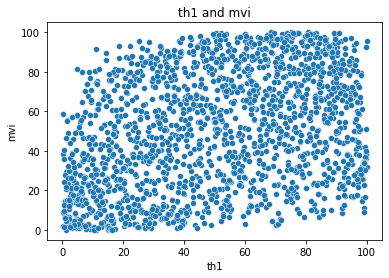

The r-value or correlation coefficient is: 0.35
The p-value is: 6.220181948059135e-53
There is 0.0% chance that we see these results by chance.


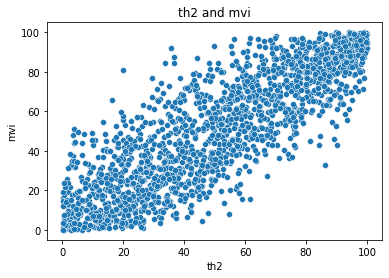

The r-value or correlation coefficient is: 0.85
The p-value is: 0.0
There is 0.0% chance that we see these results by chance.


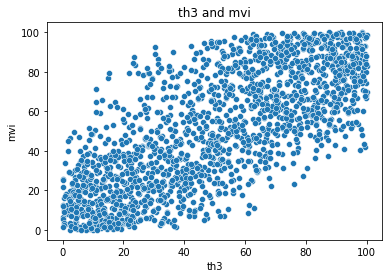

The r-value or correlation coefficient is: 0.74
The p-value is: 1.3078921637769433e-306
There is 0.0% chance that we see these results by chance.


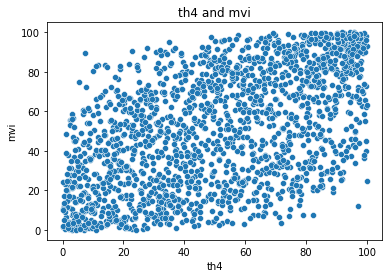

The r-value or correlation coefficient is: 0.55
The p-value is: 1.2346262638921073e-138
There is 0.0% chance that we see these results by chance.


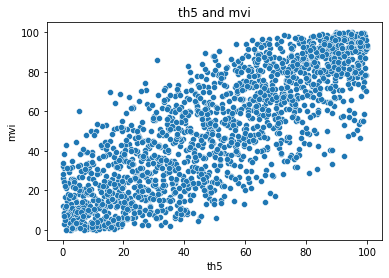

The r-value or correlation coefficient is: 0.81
The p-value is: 0.0
There is 0.0% chance that we see these results by chance.


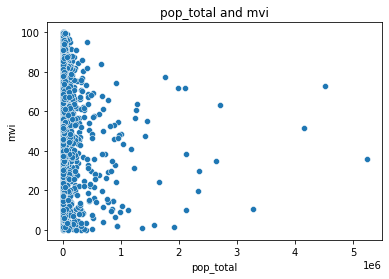

The r-value or correlation coefficient is: -0.06
The p-value is: 0.01697721805157831
There is 0.0% chance that we see these results by chance.


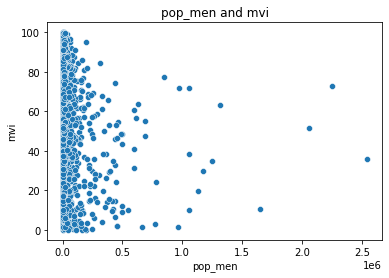

The r-value or correlation coefficient is: -0.06
The p-value is: 0.014568158037229783
There is 0.0% chance that we see these results by chance.


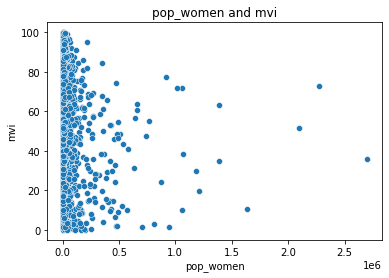

The r-value or correlation coefficient is: -0.06
The p-value is: 0.018184656283977425
There is 0.0% chance that we see these results by chance.


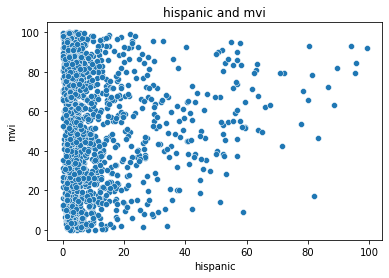

The r-value or correlation coefficient is: -0.03
The p-value is: 0.19359961450789057
There is 0.2% chance that we see these results by chance.


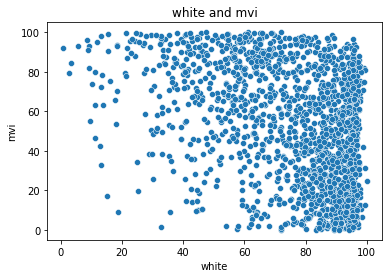

The r-value or correlation coefficient is: -0.39
The p-value is: 8.238513952729558e-65
There is 0.0% chance that we see these results by chance.


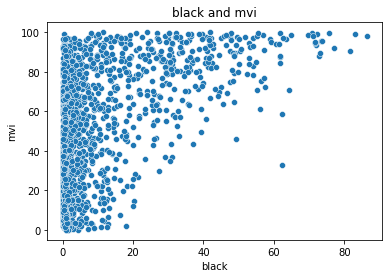

The r-value or correlation coefficient is: 0.47
The p-value is: 5.016896040588407e-96
There is 0.0% chance that we see these results by chance.


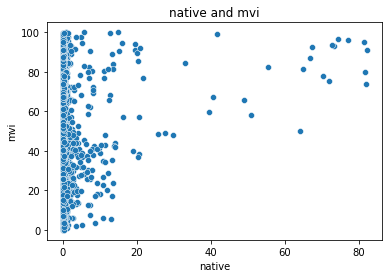

The r-value or correlation coefficient is: -0.07
The p-value is: 0.002002479714642324
There is 0.0% chance that we see these results by chance.


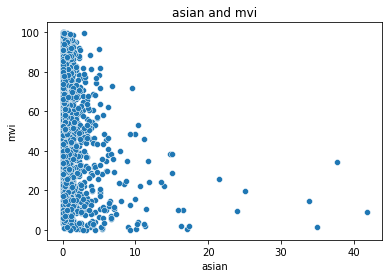

The r-value or correlation coefficient is: -0.27
The p-value is: 9.392545468820114e-30
There is 0.0% chance that we see these results by chance.


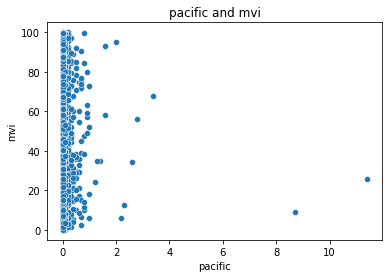

The r-value or correlation coefficient is: -0.04
The p-value is: 0.09035044000544981
There is 0.1% chance that we see these results by chance.


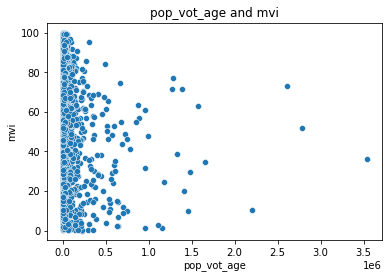

The r-value or correlation coefficient is: -0.06
The p-value is: 0.009280510412977018
There is 0.0% chance that we see these results by chance.


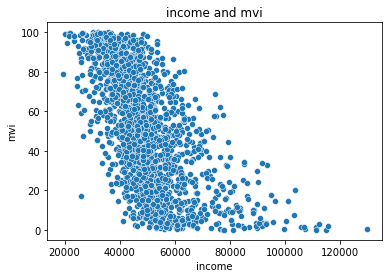

The r-value or correlation coefficient is: -0.68
The p-value is: 3.360814846432414e-239
There is 0.0% chance that we see these results by chance.


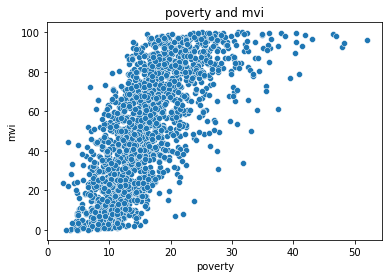

The r-value or correlation coefficient is: 0.75
The p-value is: 8.3612791379e-313
There is 0.0% chance that we see these results by chance.


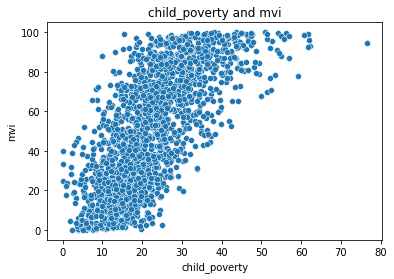

The r-value or correlation coefficient is: 0.73
The p-value is: 3.6856979141923825e-289
There is 0.0% chance that we see these results by chance.


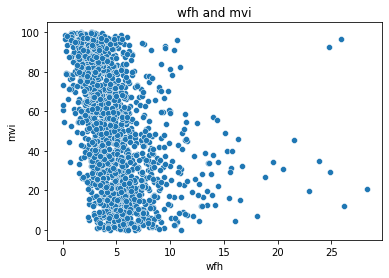

The r-value or correlation coefficient is: -0.54
The p-value is: 1.8240583538191054e-133
There is 0.0% chance that we see these results by chance.


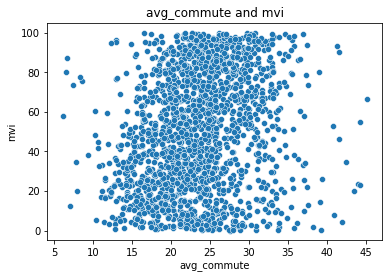

The r-value or correlation coefficient is: 0.25
The p-value is: 1.0332255485178722e-25
There is 0.0% chance that we see these results by chance.


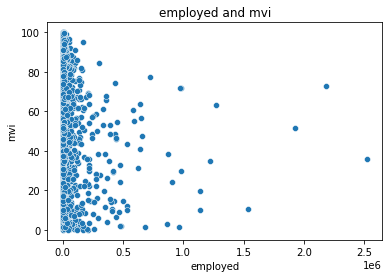

The r-value or correlation coefficient is: -0.13
The p-value is: 5.3424922983724145e-08
There is 0.0% chance that we see these results by chance.


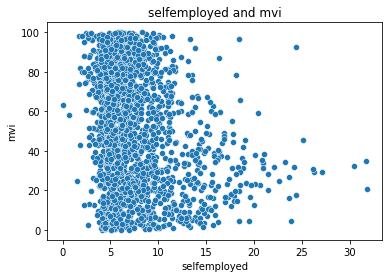

The r-value or correlation coefficient is: -0.2
The p-value is: 2.9594500537082094e-17
There is 0.0% chance that we see these results by chance.


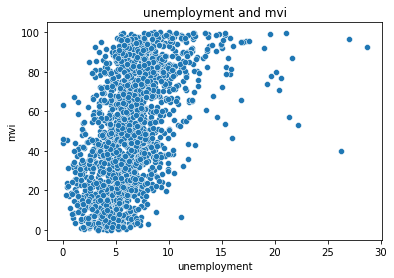

The r-value or correlation coefficient is: 0.56
The p-value is: 5.0821692483289114e-144
There is 0.0% chance that we see these results by chance.


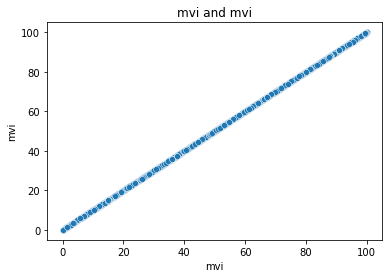

The r-value or correlation coefficient is: 1.0
The p-value is: 0.0
There is 0.0% chance that we see these results by chance.


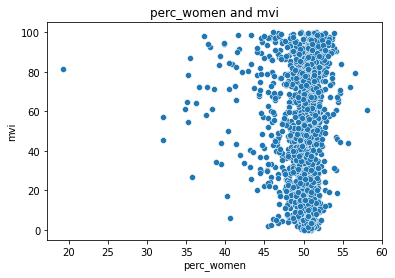

The r-value or correlation coefficient is: 0.16
The p-value is: 2.1694340296209183e-11
There is 0.0% chance that we see these results by chance.


In [11]:
for var in train[num_list]:
    plot_numvar_target(train, var)

In [12]:
train.head(2)

,state,th1,th2,th3,th4,th5,county,pop_total,pop_men,pop_women,hispanic,white,black,native,asian,pacific,pop_vot_age,income,poverty,child_poverty,wfh,avg_commute,employed,selfemployed,unemployment,mvi,more_women,perc_women,region
41013,Oregon,11.370,33.650,64.150,29.700,35.820,Crook County,21717,10627,11090,7.600,88.400,0.200,0.900,0.300,0.400,16984,41777,15.300,23.100,6.500,23.400,8828,10.100,8.300,30.560,True,51.100,West
45005,South Carolina,59.850,98.310,78.920,50.080,96.820,Allendale County,9402,4952,4450,3.100,22.500,73.500,0.500,0.000,0.000,7492,23331,30.400,52.700,1.600,28.300,2668,5.700,17.300,95.770,False,47.300,South


### Now that I have looked at the numerical variables and plotted them against the target `mvi`, I will look at the categorical variables and plot those against the target

In [13]:
# concatenated df with boolean and object variables

train_cat = pd.concat([train[bool_list], train[obj_list]], axis = 1)
train_cat.head()

,more_women,state,county,region
41013,True,Oregon,Crook County,West
45005,False,South Carolina,Allendale County,South
48231,True,Texas,Hunt County,Southwest
48065,True,Texas,Carson County,Southwest
12125,False,Florida,Union County,South


In [14]:
for var in train_cat.columns:
    print(var.upper())
    print(train[var].nunique())
    print()

MORE_WOMEN
2

STATE
50

COUNTY
1193

REGION
5



MORE_WOMEN plotted against target


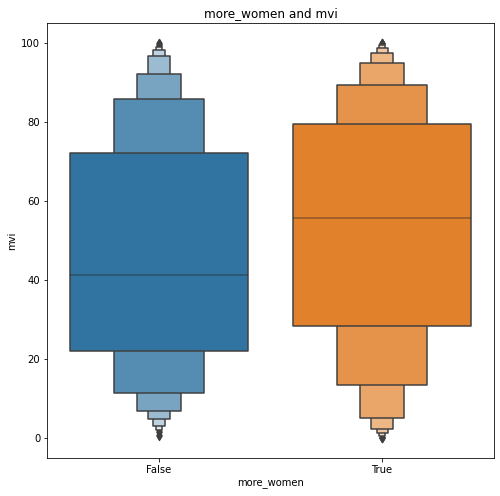

STATE has more than x10 unique features

COUNTY has more than x10 unique features

REGION plotted against target


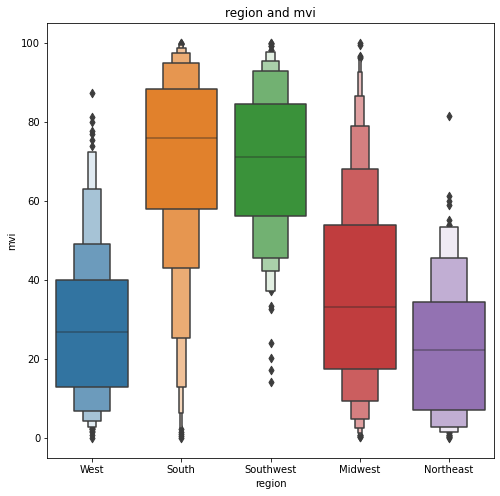

In [15]:
for var in train_cat.columns:
    
    if train[var].nunique() < 10:
        print(f'{var.upper()} plotted against target')
        plt.figure(figsize = (8, 8))
        sns.boxenplot(x = train_cat[var], y = train.mvi)
        plt.title(f'{var} and mvi')
        plt.show();

    else:
        print(f'{var.upper()} has more than x10 unique features')
        print()

##### Going to look at the states against MVI by region

In [16]:
train.region.value_counts()

South        610
Midwest      591
West         223
Southwest    211
Northeast    123
Name: region, dtype: int64

<Figure size 2880x288 with 0 Axes>

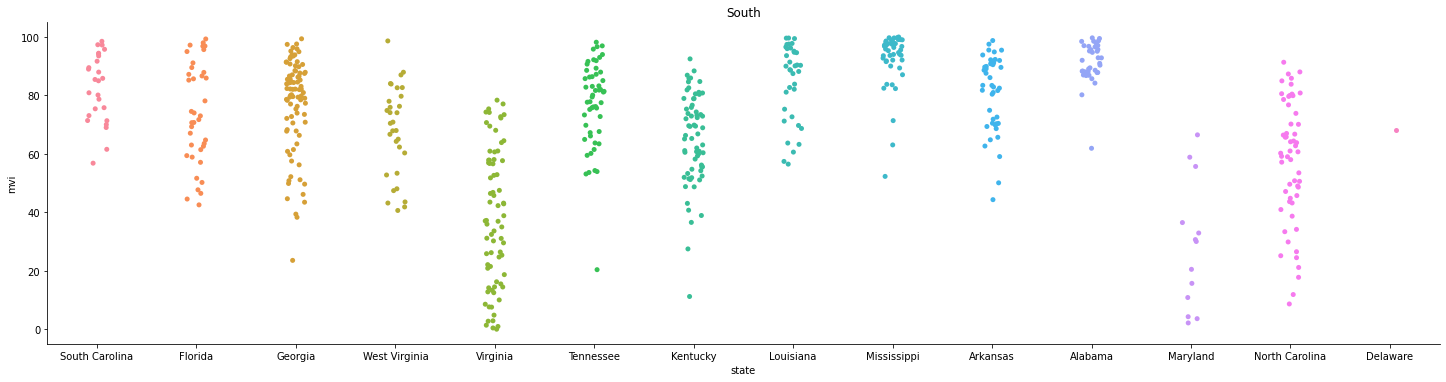

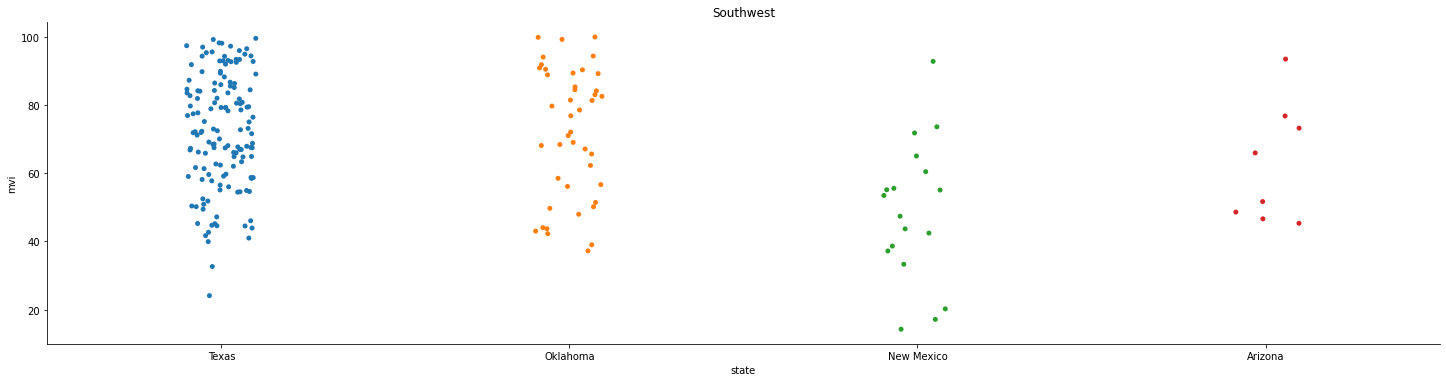

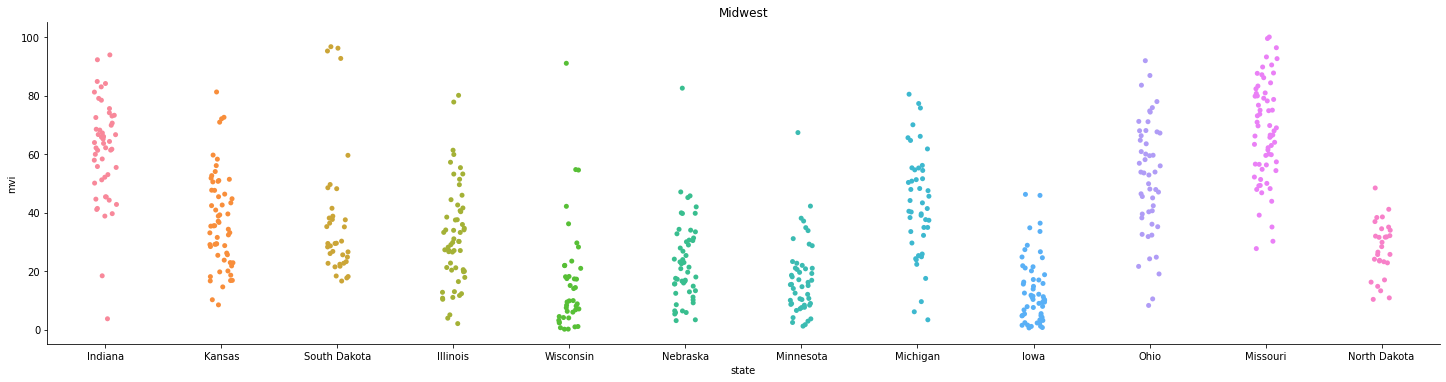

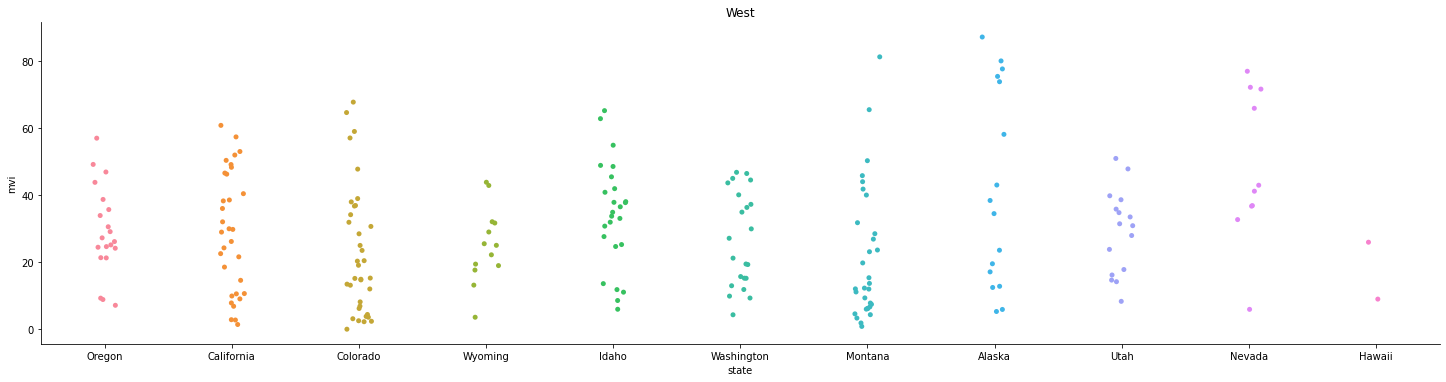

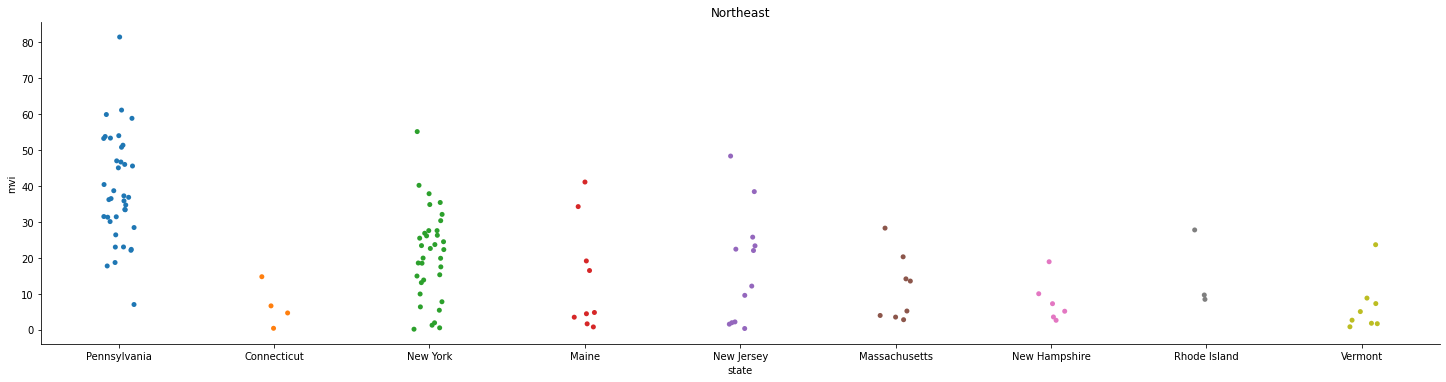

In [17]:
plt.figure(figsize = (40, 4))

# south
sns.catplot(x = 'state', y = 'mvi', data = train[train.region == 'South'], aspect = 4)
plt.title('South')
plt.show();
print()
print()

# southwest
sns.catplot(x = 'state', y = 'mvi', data = train[train.region == 'Southwest'], aspect = 4)
plt.title('Southwest')
plt.show();
print()
print()

# midwest
sns.catplot(x = 'state', y = 'mvi', data = train[train.region == 'Midwest'], aspect = 4)
plt.title('Midwest')
plt.show();
print()
print()


# west
sns.catplot(x = 'state', y = 'mvi', data = train[train.region == 'West'], aspect = 4)
plt.title('West')
plt.show();
print()
print()

# northest
sns.catplot(x = 'state', y = 'mvi', data = train[train.region == 'Northeast'], aspect = 4)
plt.title('Northeast')
plt.show();
print()
print()



In [18]:
aaa

NameError: name 'aaa' is not defined

In [100]:
# selecting number of features (k)
k = 4

# creating KBest object
kbest = SelectKBest(f_regression, k = k)

# fitting object to train data
kbest.fit(X_train_scaled, y_train)

# using fitted object to return kbest features
best_features = X_train.columns[kbest.get_support()].tolist()
best_features

['th2', 'th3', 'th4', 'th5']

In [102]:
# selecting number of features (k)
k = 4

# creating KBest object
kbest = SelectKBest(f_regression, k = k)

# fitting object to train data
kbest.fit(X_train, y_train)

# using fitted object to return kbest features
best_features = X_train.columns[kbest.get_support()].tolist()
best_features

['th2', 'th3', 'th4', 'th5']

In [120]:
for i in range(1, 13):
    
    # selecting number of features (k)
    k = i

    # creating KBest object
    kbest = SelectKBest(f_regression, k = k)

    # fitting object to train data
    kbest.fit(train[num_list].drop(columns = ['mvi', 'child_poverty', 'employed', 'pop_men', 'pop_vot_age', \
                                              'pop_women']), train.mvi)

    # using fitted object to return kbest features
    best_features = train[num_list].drop(columns = ['mvi', 'child_poverty', 'employed', 'pop_men', 'pop_vot_age',\
                                                    'pop_women']).columns[kbest.get_support()].tolist()
    print(f'List of {i} best features:\n{best_features}')
    print()

List of 1 best features:
['th2']

List of 2 best features:
['th2', 'th5']

List of 3 best features:
['th2', 'th3', 'th5']

List of 4 best features:
['th2', 'th3', 'th5', 'poverty']

List of 5 best features:
['th2', 'th3', 'th5', 'income', 'poverty']

List of 6 best features:
['th2', 'th3', 'th4', 'th5', 'income', 'poverty']

List of 7 best features:
['th2', 'th3', 'th4', 'th5', 'income', 'poverty', 'unemployment']

List of 8 best features:
['th2', 'th3', 'th4', 'th5', 'black', 'income', 'poverty', 'unemployment']

List of 9 best features:
['th2', 'th3', 'th4', 'th5', 'black', 'income', 'poverty', 'wfh', 'unemployment']

List of 10 best features:
['th2', 'th3', 'th4', 'th5', 'white', 'black', 'income', 'poverty', 'wfh', 'unemployment']

List of 11 best features:
['th1', 'th2', 'th3', 'th4', 'th5', 'white', 'black', 'income', 'poverty', 'wfh', 'unemployment']

List of 12 best features:
['th1', 'th2', 'th3', 'th4', 'th5', 'white', 'black', 'income', 'poverty', 'wfh', 'selfemployed', 'unem

In [110]:
correlated_features

{'child_poverty', 'employed', 'pop_men', 'pop_vot_age', 'pop_women'}

In [117]:
train[num_list].drop(columns = ['mvi', 'child_poverty', 'employed', 'pop_men', 'pop_vot_age', \
                                              'pop_women']).shape[1]

19

# Using `RFE` to determine to rank variable importance
First I will need to prepare the data for mdoeling. For my mvi, I am just going to focus on the variables that are already numeric

In [19]:
# df of all numeric columns
train_num = train[num_list]
train_num.head()

,th1,th2,th3,th4,th5,pop_total,pop_men,pop_women,hispanic,white,black,native,asian,pacific,pop_vot_age,income,poverty,child_poverty,wfh,avg_commute,employed,selfemployed,unemployment,mvi,perc_women
41013,11.370,33.650,64.150,29.700,35.820,21717,10627,11090,7.600,88.400,0.200,0.900,0.300,0.400,16984,41777,15.300,23.100,6.500,23.400,8828,10.100,8.300,30.560,51.100
45005,59.850,98.310,78.920,50.080,96.820,9402,4952,4450,3.100,22.500,73.500,0.500,0.000,0.000,7492,23331,30.400,52.700,1.600,28.300,2668,5.700,17.300,95.770,47.300
48231,73.730,64.440,50.430,98.030,85.290,90322,44432,45890,15.300,72.900,7.800,0.800,1.200,0.000,65205,49319,18.800,26.200,3.600,30.800,38753,6.200,6.500,93.090,50.800
48065,97.580,17.960,35.690,93.730,12.860,6033,2888,3145,9.700,86.400,0.600,0.400,0.500,0.200,4433,67010,6.400,7.800,3.300,19.700,2896,8.100,1.900,41.710,52.100
12125,17.640,92.420,61.730,83.730,75.520,15300,9922,5378,5.400,69.900,21.900,0.700,0.500,0.000,12093,37460,21.400,32.300,4.200,22.400,3800,5.500,9.800,78.130,35.200


### I do not want to run `RFE` on any independent variables that may be highly correlated with one another.
I will use the following for loop to create identify which variables are have a correlation of over .65 with one or more other independent variables. I will create a variable called `correlated_features` and use it to drop them prior to running RFE.

In [24]:
correlated_features = set()
correlation_matrix = train_num.drop('mvi', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

#### And here is my list of `correlated_features` that I will drop from my df before running `RFE`

In [25]:
correlated_features

{'child_poverty', 'employed', 'pop_men', 'pop_vot_age', 'pop_women'}

### I can also see a correlation matrix of all of the figures, from the stored variable `correlation_matrix`

In [26]:
correlation_matrix

,th1,th2,th3,th4,th5,pop_total,pop_men,pop_women,hispanic,white,black,native,asian,pacific,pop_vot_age,income,poverty,child_poverty,wfh,avg_commute,employed,selfemployed,unemployment,perc_women
th1,1.000,0.091,0.115,0.339,0.045,-0.207,-0.207,-0.208,0.053,0.083,-0.076,-0.035,-0.269,-0.055,-0.220,-0.198,0.030,0.023,0.026,-0.128,-0.210,0.257,-0.148,-0.115
th2,0.091,1.000,0.688,0.292,0.703,-0.055,-0.057,-0.053,-0.065,-0.394,0.612,0.059,-0.180,-0.069,-0.057,-0.556,0.628,0.668,-0.467,0.267,-0.070,-0.314,0.530,0.100
th3,0.115,0.688,1.000,0.195,0.488,-0.109,-0.110,-0.107,-0.264,0.003,0.282,0.023,-0.244,-0.078,-0.103,-0.498,0.514,0.523,-0.413,0.389,-0.118,-0.328,0.434,0.108
th4,0.339,0.292,0.195,1.000,0.329,-0.203,-0.201,-0.204,0.190,-0.278,0.154,0.187,-0.251,-0.027,-0.219,-0.313,0.294,0.267,-0.009,0.063,-0.209,0.153,0.162,-0.225
th5,0.045,0.703,0.488,0.329,1.000,0.017,0.016,0.018,0.290,-0.579,0.464,0.136,-0.082,0.014,0.012,-0.637,0.784,0.772,-0.381,0.067,-0.001,-0.261,0.583,0.029
pop_total,-0.207,-0.055,-0.109,-0.203,0.017,1.000,1.000,1.000,0.201,-0.255,0.078,-0.051,0.498,0.077,0.997,0.259,-0.065,-0.056,-0.015,0.189,0.997,-0.158,0.038,0.115
pop_men,-0.207,-0.057,-0.110,-0.201,0.016,1.000,1.000,0.999,0.202,-0.255,0.075,-0.050,0.500,0.080,0.996,0.260,-0.066,-0.057,-0.015,0.188,0.997,-0.158,0.038,0.111
pop_women,-0.208,-0.053,-0.107,-0.204,0.018,1.000,0.999,1.000,0.199,-0.255,0.080,-0.051,0.495,0.075,0.997,0.257,-0.064,-0.055,-0.015,0.190,0.997,-0.158,0.039,0.118
hispanic,0.053,-0.065,-0.264,0.190,0.290,0.201,0.202,0.199,1.000,-0.597,-0.120,-0.044,0.129,0.039,0.184,0.042,0.060,0.057,-0.012,-0.072,0.190,0.027,0.035,-0.125
white,0.083,-0.394,0.003,-0.278,-0.579,-0.255,-0.255,-0.255,-0.597,1.000,-0.596,-0.289,-0.261,-0.125,-0.246,0.134,-0.455,-0.449,0.185,-0.031,-0.246,0.226,-0.439,0.053


## Now I can drop the high correlated `correlated_features` columns and get a df I can do `rfe` with

In [28]:
correlated_features

{'child_poverty', 'employed', 'pop_men', 'pop_vot_age', 'pop_women'}

In [27]:
train_rfe = train_num.drop(columns = correlated_features)

# looking at the correlation matrix for the remaining variables
train_rfe.head(2)

,th1,th2,th3,th4,th5,pop_total,hispanic,white,black,native,asian,pacific,income,poverty,wfh,avg_commute,selfemployed,unemployment,mvi,perc_women
41013,11.370,33.650,64.150,29.700,35.820,21717,7.600,88.400,0.200,0.900,0.300,0.400,41777,15.300,6.500,23.400,10.100,8.300,30.560,51.100
45005,59.850,98.310,78.920,50.080,96.820,9402,3.100,22.500,73.500,0.500,0.000,0.000,23331,30.400,1.600,28.300,5.700,17.300,95.770,47.300


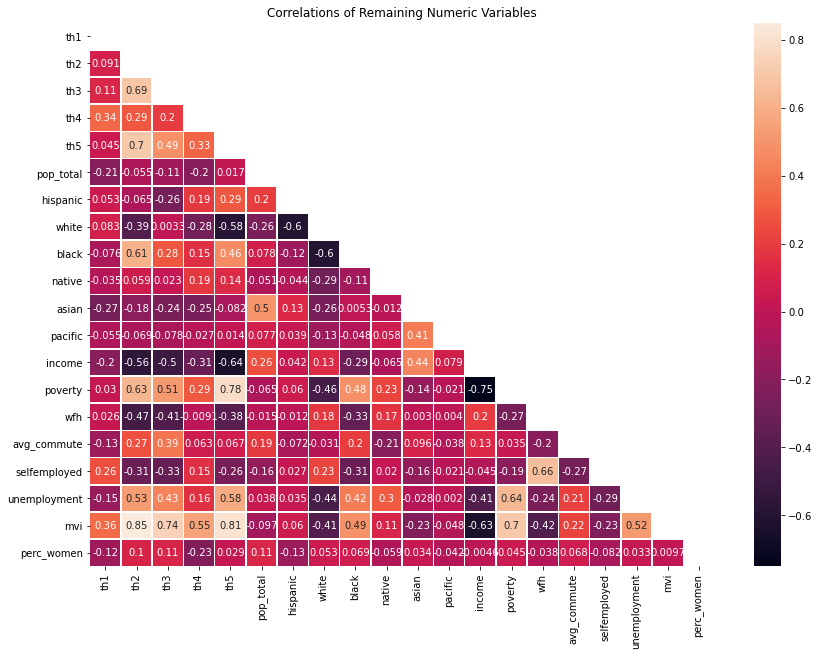

In [34]:
# setting figure size
plt.figure(figsize = (14, 10))

# mask for upper triangle
mask = np.triu(np.ones_like(train_rfe.corr(), dtype=bool))

# setting color palette
# cmap = sns.color_palette("rocket_r", as_cmap=True)

# plotting correlation heatmap
sns.heatmap(train_rfe.corr(), mask = mask, linewidths=.6, annot = True)
plt.title('Correlations of Remaining Numeric Variables')
plt.show()

### Now to run `rfe` on the `train_rfe` df features.

In [35]:
train_rfe.columns

Index(['th1', 'th2', 'th3', 'th4', 'th5', 'pop_total', 'hispanic', 'white',
       'black', 'native', 'asian', 'pacific', 'income', 'poverty', 'wfh',
       'avg_commute', 'selfemployed', 'unemployment', 'mvi', 'perc_women'],
      dtype='object')

## For the first past I actually think I will skip `rfe` and just scale the `th1` - `th5` and a few other features I am interested in looking at

- `wfh` 
- `unemployment` 
- `perc_women`

### Creating `X` and `y` feature df and series

In [121]:
# train
X_train = train[['th2', 'th3', 'th4', 'th5', 'black', 'income', 'poverty', 'wfh', 'unemployment']]
y_train = train.mvi

In [122]:
# list of X columns
X_cols = list(X_train.columns)

# for validate
X_validate = validate[X_cols]
y_validate = validate.mvi

# for test
X_test = test[X_cols]
y_test = test.mvi

In [123]:
X_train.head(2)

,th2,th3,th4,th5,black,income,poverty,wfh,unemployment
41013,33.650,64.150,29.700,35.820,0.200,41777,15.300,6.500,8.300
45005,98.310,78.920,50.080,96.820,73.500,23331,30.400,1.600,17.300


In [124]:
y_train.head(2)

41013   30.560
45005   95.770
Name: mvi, dtype: float64

In [125]:
print(f'There are {X_train.shape[1]} features we will run through modeling for the first past.')

There are 9 features we will run through modeling for the first past.


## Scaling features ...
Ensuring no one feature(s) unfairly outweighs others because of how it is measured

In [213]:
# creating scaler object
scaler = sklearn.preprocessing.RobustScaler()

# fitting the scaler on X_train
scaler.fit(X_train)

# scaling each X dataframe of features
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_train_scaled.columns = X_train.columns

X_validate_scaled = pd.DataFrame(scaler.transform(X_validate))
X_validate_scaled.columns = X_validate.columns

X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_test_scaled.columns = X_test.columns


In [214]:
X_train_scaled.head()

,th2,th3,th4,th5,black,income,poverty,wfh,unemployment
0,-0.321,0.261,-0.419,-0.281,-0.191,-0.413,0.012,0.828,0.676
1,0.965,0.551,-0.014,0.928,7.606,-1.694,1.831,-0.862,3.324
2,0.292,-0.008,0.939,0.699,0.617,0.110,0.434,-0.172,0.147
3,-0.633,-0.297,0.853,-0.736,-0.149,1.338,-1.060,-0.276,-1.206
4,0.848,0.214,0.655,0.506,2.117,-0.713,0.747,0.034,1.118


### Visualizing the scaled features

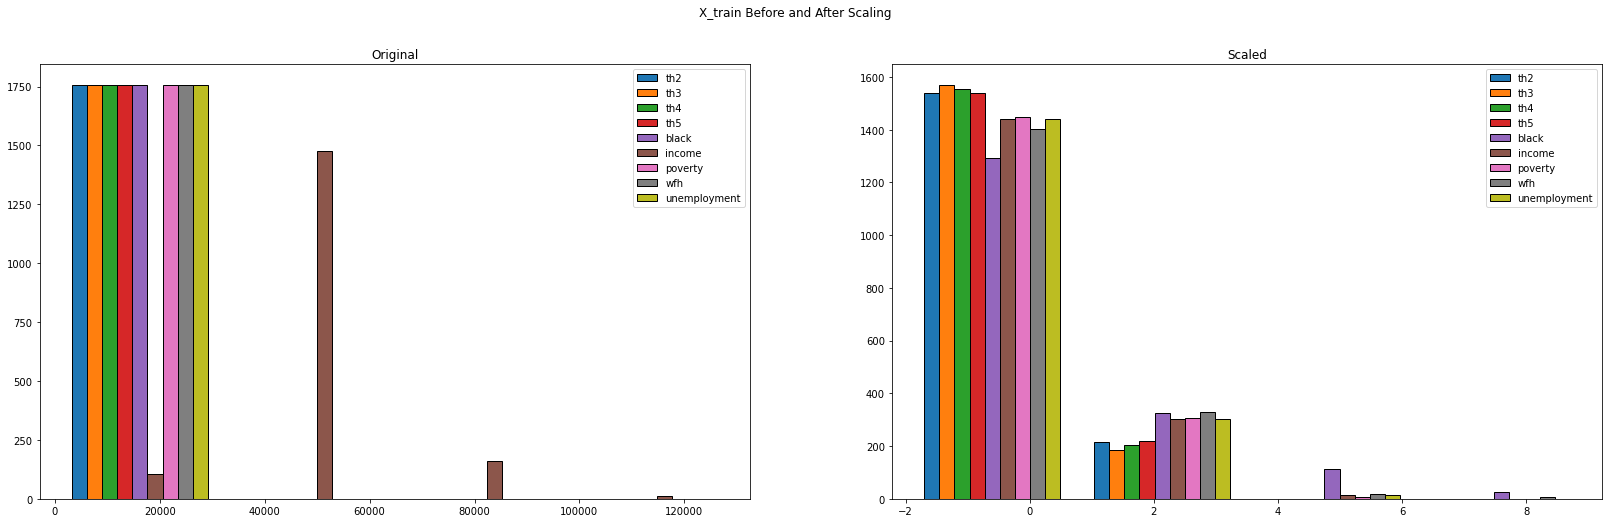

In [215]:
plt.figure(figsize=(28, 8))

plt.subplot(121)
plt.hist(X_train, bins = 4, ec='black')
plt.legend(X_train.columns)
plt.title('Original')

plt.subplot(122)
plt.hist(X_train_scaled, bins=4, ec='black')
plt.legend(X_train.columns)
plt.title('Scaled')


plt.suptitle('X_train Before and After Scaling')
plt.show();

## Baseline Prediction

In [150]:
# creating df to store mvi predictions
df_y_train = pd.DataFrame(y_train).rename(columns = {'mvi': 'actual_mvi'})

In [151]:
df_y_train.head(2)

,actual_mvi
41013,30.560
45005,95.770


In [152]:
# calculating mvi predictional baseline as median score
median = df_y_train.actual_mvi.median()
median

50.555

In [154]:
df_y_train['baseline'] = median
df_y_train.head(2)

,actual_mvi,baseline
41013,30.560,50.555
45005,95.770,50.555


In [155]:
df_y_validate = pd.DataFrame(y_validate).rename(columns = {'mvi': 'actual_mvi'})
df_y_test = pd.DataFrame(y_test).rename(columns = {'mvi': 'actual_mvi'})

df_y_validate['baseline'] = median
df_y_test['baseline'] = median

In [160]:
# calculating RMSE for baseline
RMSE_train_baseline = np.sqrt(mean_squared_error(df_y_train.actual_mvi, df_y_train.baseline))
RMSE_validate_baseline = np.sqrt(mean_squared_error(df_y_validate.actual_mvi, df_y_validate.baseline))

print(f'Baseline RMSE | Train, In Sample: {RMSE_train_baseline}')
print(f'Baseline RMSE | Validate, Out of Sample: {RMSE_validate_baseline}')
print()

Baseline RMSE | Train, In Sample: 29.194168353317856
Baseline RMSE | Validate, Out of Sample: 28.428333067931018



# Linear Regression `lr` model

In [238]:
# creating linear regression object
lr = LinearRegression()

# fitting the object to train
lr.fit(X_train_scaled, df_y_train.actual_mvi)

# predict 
df_y_train['lr_pred'] = lr.predict(X_train_scaled)
df_y_validate['lr_pred'] = lr.predict(X_validate_scaled)

# evalutating lr model prediction
RMSE_train_lr = np.sqrt(mean_squared_error(df_y_train.actual_mvi, df_y_train.lr_pred))
RMSE_validate_lr = np.sqrt(mean_squared_error(df_y_validate.actual_mvi, df_y_validate.lr_pred))

print(f'LinearRegression RMSE | Train, In Sample: {RMSE_train_lr}')
print(f'LinearRegression RMSE | Validate, Out of Sample: {RMSE_validate_lr}')
print()

LinearRegression RMSE | Train, In Sample: 7.705340755213684
LinearRegression RMSE | Validate, Out of Sample: 7.45807892669376



## The `LinearRegression` model blows the baseline out of the water!

## LassoLars `lars` model
This model is performing awful :(
>After going back to the lesson notes, it advises that `y_train` should be normally distributed, so this makes sense, because `y_train` is actually uniformly (not normally) distributed

I will still run this model and evaluate the results for comparison to baseline.

In [239]:
# creating the lasso lars object
lars = LassoLars(alpha = 2.0)

# fitting the object to train
lars.fit(X_train_scaled, y_train)

# predict
df_y_train['lars_pred'] = lars.predict(X_train_scaled)
df_y_validate['lars_pred'] = lars.predict(X_validate_scaled)

# evaluate
RMSE_train_lars = np.sqrt(mean_squared_error(df_y_train.actual_mvi, df_y_train.lars_pred))
RMSE_validate_lars = np.sqrt(mean_squared_error(df_y_validate.actual_mvi, df_y_validate.lars_pred))

print(f'LassoLars RMSE | Train, In Sample: {RMSE_train_lars}')
print(f'LassoLars RMSE | Validate, Out of Sample: {RMSE_validate_lars}')
print()

LassoLars RMSE | Train, In Sample: 29.194135214850267
LassoLars RMSE | Validate, Out of Sample: 28.426668619522225



#### It performs micro-hairs slightly better than baseline

In [240]:
train.head()

,state,th1,th2,th3,th4,th5,county,pop_total,pop_men,pop_women,hispanic,white,black,native,asian,pacific,pop_vot_age,income,poverty,child_poverty,wfh,avg_commute,employed,selfemployed,unemployment,mvi,more_women,perc_women,region
41013,Oregon,11.370,33.650,64.150,29.700,35.820,Crook County,21717,10627,11090,7.600,88.400,0.200,0.900,0.300,0.400,16984,41777,15.300,23.100,6.500,23.400,8828,10.100,8.300,30.560,True,51.100,West
45005,South Carolina,59.850,98.310,78.920,50.080,96.820,Allendale County,9402,4952,4450,3.100,22.500,73.500,0.500,0.000,0.000,7492,23331,30.400,52.700,1.600,28.300,2668,5.700,17.300,95.770,False,47.300,South
48231,Texas,73.730,64.440,50.430,98.030,85.290,Hunt County,90322,44432,45890,15.300,72.900,7.800,0.800,1.200,0.000,65205,49319,18.800,26.200,3.600,30.800,38753,6.200,6.500,93.090,True,50.800,Southwest
48065,Texas,97.580,17.960,35.690,93.730,12.860,Carson County,6033,2888,3145,9.700,86.400,0.600,0.400,0.500,0.200,4433,67010,6.400,7.800,3.300,19.700,2896,8.100,1.900,41.710,True,52.100,Southwest
12125,Florida,17.640,92.420,61.730,83.730,75.520,Union County,15300,9922,5378,5.400,69.900,21.900,0.700,0.500,0.000,12093,37460,21.400,32.300,4.200,22.400,3800,5.500,9.800,78.130,False,35.200,South


In [220]:
X_train_scaled.head()

,th2,th3,th4,th5,black,income,poverty,wfh,unemployment
0,-0.321,0.261,-0.419,-0.281,-0.191,-0.413,0.012,0.828,0.676
1,0.965,0.551,-0.014,0.928,7.606,-1.694,1.831,-0.862,3.324
2,0.292,-0.008,0.939,0.699,0.617,0.110,0.434,-0.172,0.147
3,-0.633,-0.297,0.853,-0.736,-0.149,1.338,-1.060,-0.276,-1.206
4,0.848,0.214,0.655,0.506,2.117,-0.713,0.747,0.034,1.118


In [222]:
df_y_train.head()

,actual_mvi,baseline,lr_pred
41013,30.560,50.555,37.087
45005,95.770,50.555,89.365
48231,93.090,50.555,81.135
48065,41.710,50.555,36.256
12125,78.130,50.555,84.744


# Takeaways from explore ...
>## and a bit of feature selection and modeling

After speaking with an instructor, I can see there is possible target leakage in predicting my `mvi` score. Because the `th` values were used to calculate this score then there my model is doing a bit of peaking at the solution if I use them as a feature.
<br>
<hr>
Another interesting way to model this data would be to instead use one of the `th` scores as the target and then use the demographic data to try and predict that target, looking at opportunities to better the respective vulnerability index score. 

In [241]:
train

,state,th1,th2,th3,th4,th5,county,pop_total,pop_men,pop_women,hispanic,white,black,native,asian,pacific,pop_vot_age,income,poverty,child_poverty,wfh,avg_commute,employed,selfemployed,unemployment,mvi,more_women,perc_women,region
41013,Oregon,11.370,33.650,64.150,29.700,35.820,Crook County,21717,10627,11090,7.600,88.400,0.200,0.900,0.300,0.400,16984,41777,15.300,23.100,6.500,23.400,8828,10.100,8.300,30.560,True,51.100,West
45005,South Carolina,59.850,98.310,78.920,50.080,96.820,Allendale County,9402,4952,4450,3.100,22.500,73.500,0.500,0.000,0.000,7492,23331,30.400,52.700,1.600,28.300,2668,5.700,17.300,95.770,False,47.300,South
48231,Texas,73.730,64.440,50.430,98.030,85.290,Hunt County,90322,44432,45890,15.300,72.900,7.800,0.800,1.200,0.000,65205,49319,18.800,26.200,3.600,30.800,38753,6.200,6.500,93.090,True,50.800,Southwest
48065,Texas,97.580,17.960,35.690,93.730,12.860,Carson County,6033,2888,3145,9.700,86.400,0.600,0.400,0.500,0.200,4433,67010,6.400,7.800,3.300,19.700,2896,8.100,1.900,41.710,True,52.100,Southwest
12125,Florida,17.640,92.420,61.730,83.730,75.520,Union County,15300,9922,5378,5.400,69.900,21.900,0.700,0.500,0.000,12093,37460,21.400,32.300,4.200,22.400,3800,5.500,9.800,78.130,False,35.200,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,Alabama,36.490,97.930,81.820,58.830,85.260,Montgomery County,227120,107470,119650,3.400,35.200,57.100,0.100,2.400,0.000,167305,46545,20.800,32.100,3.400,20.300,100874,4.400,7.600,90.960,True,52.700,South
36101,New York,2.100,38.680,32.090,5.600,41.990,Steuben County,97539,48550,48989,1.600,93.800,1.600,0.100,1.500,0.000,74719,50157,14.500,21.200,3.400,21.700,43232,6.800,7.000,14.930,True,50.200,Northeast
47047,Tennessee,32.220,91.050,89.240,78.860,21.740,Fayette County,39336,19329,20007,2.500,68.300,27.700,0.300,0.700,0.000,30999,57919,14.400,22.100,4.300,33.100,17508,7.800,7.900,67.270,True,50.900,South
18167,Indiana,41.930,61.190,82.430,42.440,70.040,Vigo County,107723,54651,53072,2.600,85.800,6.200,0.200,1.900,0.000,83521,42030,19.900,25.000,2.900,19.900,47559,3.500,7.900,67.210,False,49.300,Midwest


In [243]:
train.columns

Index(['state', 'th1', 'th2', 'th3', 'th4', 'th5', 'county', 'pop_total',
       'pop_men', 'pop_women', 'hispanic', 'white', 'black', 'native', 'asian',
       'pacific', 'pop_vot_age', 'income', 'poverty', 'child_poverty', 'wfh',
       'avg_commute', 'employed', 'selfemployed', 'unemployment', 'mvi',
       'more_women', 'perc_women', 'region'],
      dtype='object')

In [244]:
train[['black', 'pop_total']]

,black,pop_total
41013,0.200,21717
45005,73.500,9402
48231,7.800,90322
48065,0.600,6033
12125,21.900,15300
...,...,...
1101,57.100,227120
36101,1.600,97539
47047,27.700,39336
18167,6.200,107723


In [272]:
train['pop_black'] = ((train.black * train.pop_total)/100).astype(int)

In [273]:
train.pop_black

41013        43
45005      6910
48231      7045
48065        36
12125      3350
          ...  
1101     129685
36101      1560
47047     10896
18167      6678
2110        324
Name: pop_black, Length: 1758, dtype: int64

In [274]:
train.pop_black.describe()

count      1758.000
mean      12864.256
std       58104.700
min           0.000
25%         100.250
50%         703.000
75%        5299.750
max     1225818.000
Name: pop_black, dtype: float64

In [300]:
train[train.pop_black >= 100.250].th3.mean()

54.5788163884673

In [299]:
train[train.pop_black < 100.250].th3.mean()

37.46750000000001

In [303]:
train['quart_pop_black'] = pd.qcut(train.pop_black, 4, labels = ['q1', 'q2', 'q3', 'q4'])

In [304]:
train.quart_pop_black.value_counts()

q1    440
q4    440
q2    439
q3    439
Name: quart_pop_black, dtype: int64

In [307]:
train[train.quart_pop_black ==  'q1'].th3.mean()

37.46750000000001

In [308]:
train[train.quart_pop_black == 'q2'].th3.mean()

52.09020501138953

In [309]:
train[train.quart_pop_black == 'q3'].th3.mean()

56.735831435079724

In [310]:
train[train.quart_pop_black == 'q4'].th3.mean()

54.909659090909116

<AxesSubplot:xlabel='quart_pop_black', ylabel='th3'>

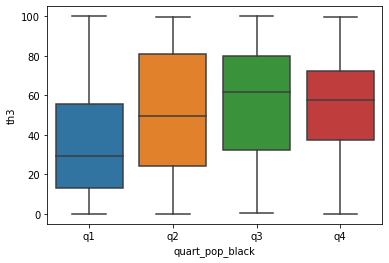

In [325]:
sns.boxplot(x = train.quart_pop_black, y = train.th3)

In [320]:
pd.qcut(train.pop_black, 4)

41013        (-0.001, 100.25]
45005    (5299.75, 1225818.0]
48231    (5299.75, 1225818.0]
48065        (-0.001, 100.25]
12125        (703.0, 5299.75]
                 ...         
1101     (5299.75, 1225818.0]
36101        (703.0, 5299.75]
47047    (5299.75, 1225818.0]
18167    (5299.75, 1225818.0]
2110          (100.25, 703.0]
Name: pop_black, Length: 1758, dtype: category
Categories (4, interval[float64]): [(-0.001, 100.25] < (100.25, 703.0] < (703.0, 5299.75] < (5299.75, 1225818.0]]

In [330]:
df_lat_long = pd.read_csv('uscounties.csv')[['county_fips', 'lat', 'lng']].set_index('county_fips')

In [332]:
train_geo = train.join(df_lat_long, how = 'inner', lsuffix = '_data', rsuffix = '_geo')

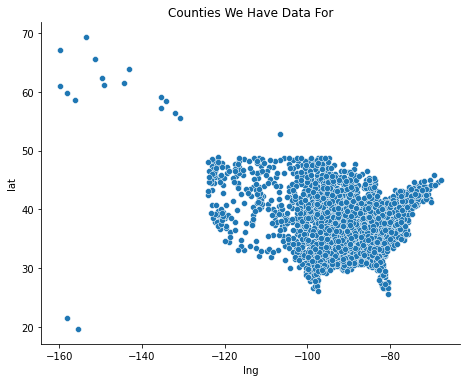

In [351]:
sns.relplot(data = train_geo, x = 'lng', y = 'lat', aspect = 1.28)
plt.title('Counties We Have Data For')
plt.show();

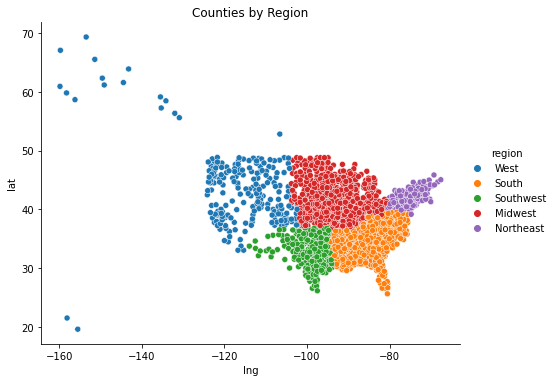

In [352]:
sns.relplot(data = train_geo, x = 'lng', y = 'lat', aspect = 1.28, hue = 'region')
plt.title('Counties by Region')
plt.show();

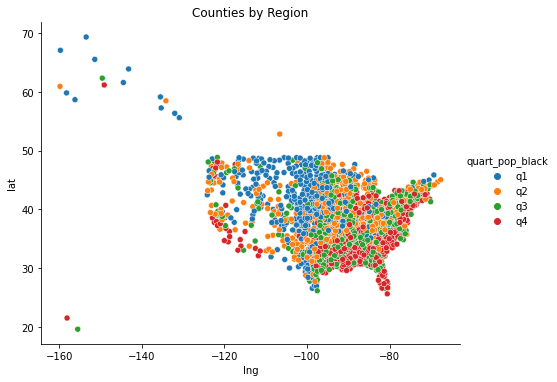

In [354]:
for value in 

sns.relplot(data = train_geo, x = 'lng', y = 'lat', aspect = 1.28, hue = 'quart_pop_black')
plt.title('Counties by Region')
plt.show();

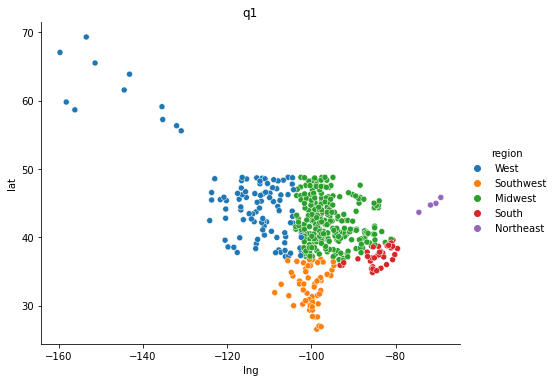

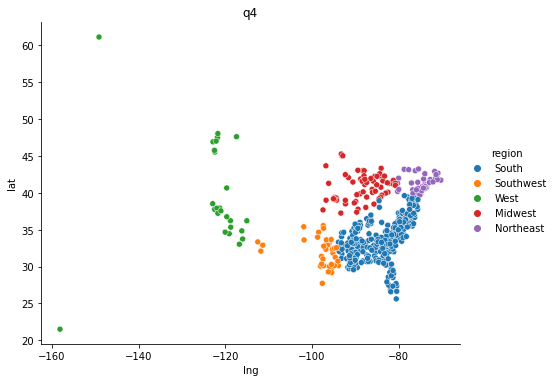

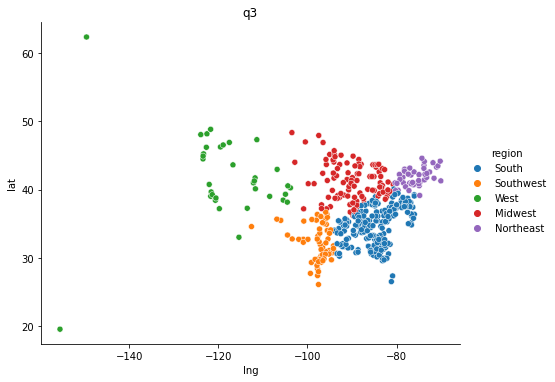

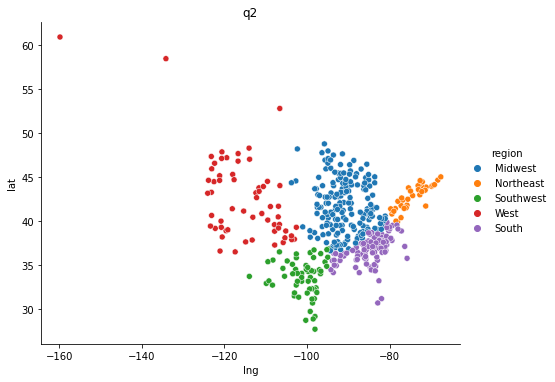

In [358]:
for quartile in train_geo.quart_pop_black.unique():
    sns.relplot(data = train_geo[train_geo.quart_pop_black == quartile], x = 'lng', y = 'lat', aspect = 1.28, \
               hue = 'region')
    plt.title(quartile)
    plt.show();

In [362]:
train[train.region == 'Midwest'].th3.mean()

38.540693739424675

In [363]:
train[train.region == 'South'].th3.mean()

72.36937704918029

In [364]:
train[train.region == 'Northeast'].th3.mean()

41.48073170731706

In [365]:
train[train.region == 'Southwest'].th3.mean()

45.44042654028437

In [377]:
train_geo['num_black_women'] = (train_geo.black/100) * (train_geo.pop_total) * (train_geo.perc_women / 100)

In [375]:
train_geo.head()

,state,th1,th2,th3,th4,th5,county,pop_total,pop_men,pop_women,hispanic,white,black,native,asian,pacific,pop_vot_age,income,poverty,child_poverty,wfh,avg_commute,employed,selfemployed,unemployment,mvi,more_women,perc_women,region,pop_black,quart_pop_black,lat,lng
41013,Oregon,11.370,33.650,64.150,29.700,35.820,Crook County,21717,10627,11090,7.600,88.400,0.200,0.900,0.300,0.400,16984,41777,15.300,23.100,6.500,23.400,8828,10.100,8.300,30.560,True,51.100,West,43,q1,44.142,-120.357
45005,South Carolina,59.850,98.310,78.920,50.080,96.820,Allendale County,9402,4952,4450,3.100,22.500,73.500,0.500,0.000,0.000,7492,23331,30.400,52.700,1.600,28.300,2668,5.700,17.300,95.770,False,47.300,South,6910,q4,32.988,-81.358
48231,Texas,73.730,64.440,50.430,98.030,85.290,Hunt County,90322,44432,45890,15.300,72.900,7.800,0.800,1.200,0.000,65205,49319,18.800,26.200,3.600,30.800,38753,6.200,6.500,93.090,True,50.800,Southwest,7045,q4,33.124,-96.085
48065,Texas,97.580,17.960,35.690,93.730,12.860,Carson County,6033,2888,3145,9.700,86.400,0.600,0.400,0.500,0.200,4433,67010,6.400,7.800,3.300,19.700,2896,8.100,1.900,41.710,True,52.100,Southwest,36,q1,35.404,-101.354
12125,Florida,17.640,92.420,61.730,83.730,75.520,Union County,15300,9922,5378,5.400,69.900,21.900,0.700,0.500,0.000,12093,37460,21.400,32.300,4.200,22.400,3800,5.500,9.800,78.130,False,35.200,South,3350,q3,30.044,-82.371


In [378]:
train_geo.num_black_women.describe()

count     1758.000
mean      6598.922
std      29996.431
min          0.000
25%         50.171
50%        346.163
75%       2652.535
max     631296.576
Name: num_black_women, dtype: float64

In [382]:
train_geo['quart_black_women'] = pd.qcut(train_geo.num_black_women, 4, labels = ['q1', 'q2', 'q3', 'q4'])

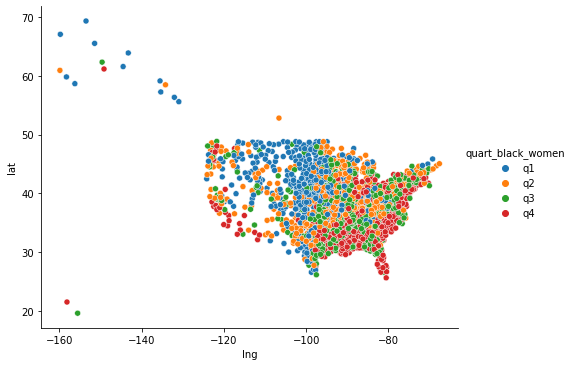

In [383]:
sns.relplot(data = train_geo, x = 'lng', y = 'lat', aspect = 1.28, hue = 'quart_black_women')

<AxesSubplot:xlabel='quart_black_women', ylabel='th3'>

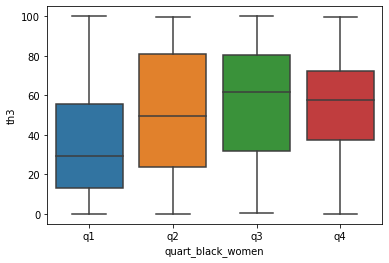

In [388]:
sns.boxplot(data = train_geo, x = 'quart_black_women', y = 'th3')

<AxesSubplot:xlabel='quart_black_women', ylabel='th3'>

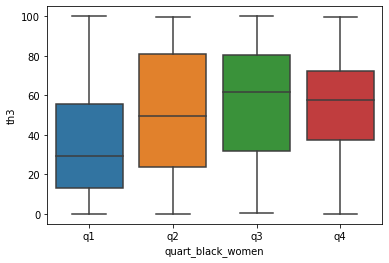

In [394]:
sns.boxplot(data = train_geo, x = 'quart_black_women', y = 'th3')